In [ ]:
import numpy as np
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import en_core_web_sm
import spacy

In [ ]:
df=pd.read_csv('sample_data/IMDB Dataset.csv')
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


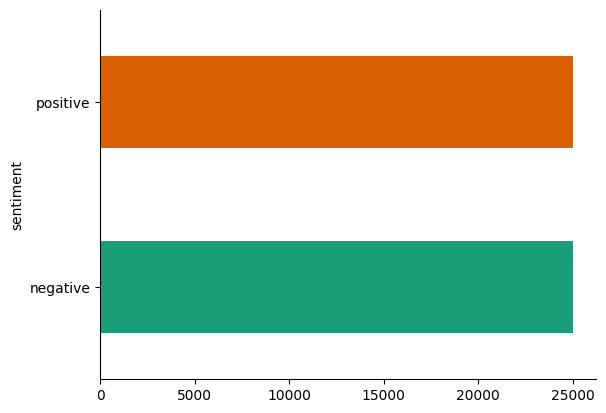

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.shape

(50000, 2)

In [ ]:
df['sentiment'].value_counts().reset_index()

,sentiment,count
0,positive,25000
1,negative,25000


In [ ]:
def remove_numbers(text):
    return re.sub('[0-9]+', '', text)
def remove_html_tags(text):
    return re.sub(r'<[^>]+>', '', text)
def remove_symbols(text):
    return re.sub("[!@#$%^&*(){}£\/'']",'',text)

In [ ]:
df['review']= df['review'].apply(lambda x: remove_numbers(x))
df['review']= df['review'].apply(lambda x: remove_html_tags(x))
df['review']= df['review'].apply(lambda x: remove_symbols(x))

In [ ]:
print(f"{df['review'][9000]} -> {df['sentiment'][9000]}")

This movie tries to hard to be something that its not....a good movie. It wants you to be fooled from begining to end,But fails.From when it starts to get interesting it falls apart and youre just hoping the ending gives you some clue of just what is going on but it didnt. -> negative


In [ ]:
nlp = en_core_web_sm.load()
nlp

In [ ]:
txt = df['review'][9862]
txt

'I enjoyed this movie. Havent seen Andy Griffith in ages and felt he fit this role perfectly. Ive associated him with comedy but am pleased to see that hes versatile.I wasnt troubled that Dottys "anxiety disorder" may not have been verbatim from a psychiatric textbook. There are zillions of whatever-phobias and neuroses, and these can take on a broad variety of quantitative and qualitative forms. She is clearly a sensitive with extra-sensory powers as was understood by the local Indians but not by any Anglos. It is not surprising that this character is vulnerable and nominally eccentric.Although this is taken to be a light "family movie", it is actually more sophisticated than it seems. Also, Hirams twist at the end came as a pleasant surprise to me and tied all the preceding action together in a bundle. Its fun to contemplate the possibility of such spiritual guidance.'

In [ ]:
doc = nlp(txt)
print(doc)

I enjoyed this movie. Havent seen Andy Griffith in ages and felt he fit this role perfectly. Ive associated him with comedy but am pleased to see that hes versatile.I wasnt troubled that Dottys "anxiety disorder" may not have been verbatim from a psychiatric textbook. There are zillions of whatever-phobias and neuroses, and these can take on a broad variety of quantitative and qualitative forms. She is clearly a sensitive with extra-sensory powers as was understood by the local Indians but not by any Anglos. It is not surprising that this character is vulnerable and nominally eccentric.Although this is taken to be a light "family movie", it is actually more sophisticated than it seems. Also, Hirams twist at the end came as a pleasant surprise to me and tied all the preceding action together in a bundle. Its fun to contemplate the possibility of such spiritual guidance.


In [ ]:
for token in doc:
    print(token)

I
enjoyed
this
movie
.
Have
nt
seen
Andy
Griffith
in
ages
and
felt
he
fit
this
role
perfectly
.
I
ve
associated
him
with
comedy
but
am
pleased
to
see
that
he
s
versatile
.
I
was
nt
troubled
that
Dottys
"
anxiety
disorder
"
may
not
have
been
verbatim
from
a
psychiatric
textbook
.
There
are
zillions
of
whatever
-
phobias
and
neuroses
,
and
these
can
take
on
a
broad
variety
of
quantitative
and
qualitative
forms
.
She
is
clearly
a
sensitive
with
extra
-
sensory
powers
as
was
understood
by
the
local
Indians
but
not
by
any
Anglos
.
It
is
not
surprising
that
this
character
is
vulnerable
and
nominally
eccentric
.
Although
this
is
taken
to
be
a
light
"
family
movie
"
,
it
is
actually
more
sophisticated
than
it
seems
.
Also
,
Hirams
twist
at
the
end
came
as
a
pleasant
surprise
to
me
and
tied
all
the
preceding
action
together
in
a
bundle
.
Its
fun
to
contemplate
the
possibility
of
such
spiritual
guidance
.


In [ ]:
for token in doc:
    print(f"Word: {token} | -> {token.lemma_}")

Word: I | -> I
Word: enjoyed | -> enjoy
Word: this | -> this
Word: movie | -> movie
Word: . | -> .
Word: Have | -> have
Word: nt | -> not
Word: seen | -> see
Word: Andy | -> Andy
Word: Griffith | -> Griffith
Word: in | -> in
Word: ages | -> age
Word: and | -> and
Word: felt | -> feel
Word: he | -> he
Word: fit | -> fit
Word: this | -> this
Word: role | -> role
Word: perfectly | -> perfectly
Word: . | -> .
Word: I | -> I
Word: ve | -> ve
Word: associated | -> associate
Word: him | -> he
Word: with | -> with
Word: comedy | -> comedy
Word: but | -> but
Word: am | -> be
Word: pleased | -> pleased
Word: to | -> to
Word: see | -> see
Word: that | -> that
Word: he | -> he
Word: s | -> s
Word: versatile | -> versatile
Word: . | -> .
Word: I | -> I
Word: was | -> be
Word: nt | -> not
Word: troubled | -> trouble
Word: that | -> that
Word: Dottys | -> Dottys
Word: " | -> "
Word: anxiety | -> anxiety
Word: disorder | -> disorder
Word: " | -> "
Word: may | -> may
Word: not | -> not
Word: have | -> 

In [ ]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [ ]:
print(txt)
print()
procces_txt = preprocess(txt)
print(procces_txt)

I enjoyed this movie. Havent seen Andy Griffith in ages and felt he fit this role perfectly. Ive associated him with comedy but am pleased to see that hes versatile.I wasnt troubled that Dottys "anxiety disorder" may not have been verbatim from a psychiatric textbook. There are zillions of whatever-phobias and neuroses, and these can take on a broad variety of quantitative and qualitative forms. She is clearly a sensitive with extra-sensory powers as was understood by the local Indians but not by any Anglos. It is not surprising that this character is vulnerable and nominally eccentric.Although this is taken to be a light "family movie", it is actually more sophisticated than it seems. Also, Hirams twist at the end came as a pleasant surprise to me and tied all the preceding action together in a bundle. Its fun to contemplate the possibility of such spiritual guidance.

enjoy movie not see Andy Griffith age feel fit role perfectly ve associate comedy pleased s versatile not trouble Dot

In [ ]:
df['preprocessed_review'] = df['review'].apply(preprocess)

In [ ]:
df

,review,sentiment,preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch Oz episode ll hook ri...
1,A wonderful little production. The filming tec...,positive,wonderful little production film technique una...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...
3,Basically theres a family where a little boy J...,negative,basically s family little boy Jake think s zom...
4,"Petter Matteis ""Love in the Time of Money"" is ...",positive,Petter Matteis Love Time money visually stunni...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,think movie right good job not creative origin...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad act idiotic directin...
49997,I am a Catholic taught in parochial elementary...,negative,Catholic teach parochial elementary school nun...
49998,Im going to have to disagree with the previous...,negative,m go disagree previous comment Maltin second r...


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['sentiment']=label.fit_transform(df['sentiment'])
df.head(10)

,review,sentiment,preprocessed_review
0,One of the other reviewers has mentioned that ...,1,reviewer mention watch Oz episode ll hook ri...
1,A wonderful little production. The filming tec...,1,wonderful little production film technique una...
2,I thought this was a wonderful way to spend ti...,1,think wonderful way spend time hot summer week...
3,Basically theres a family where a little boy J...,0,basically s family little boy Jake think s zom...
4,"Petter Matteis ""Love in the Time of Money"" is ...",1,Petter Matteis Love Time money visually stunni...
5,"Probably my all-time favorite movie, a story o...",1,probably time favorite movie story selflessnes...
6,I sure would like to see a resurrection of a u...,1,sure like resurrection date Seahunt series tec...
7,"This show was an amazing, fresh innovative id...",0,amazing fresh innovative idea s air year...
8,Encouraged by the positive comments about this...,0,encourage positive comment film look forward w...
9,If you like original gut wrenching laughter yo...,1,like original gut wrench laughter like movie y...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_review'], df['sentiment'],
                                                    test_size=0.25, random_state=42, stratify=df['sentiment'])

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (37500,)
Shape of X_test:  (12500,)


**LSTM Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
max_words = 1000
max_len = 150

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['preprocessed_review'])
X = tokenizer.texts_to_sequences(df['preprocessed_review'])
X = pad_sequences(X, maxlen=max_len)
y = np.array(df['sentiment'])

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
embedding_dim = 100

model1 = Sequential()
model1.add(Embedding(max_words, embedding_dim))
model1.add(SpatialDropout1D(0.2))
model1.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 8

batch_size = 264 # suffisant
history1 = model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         100000    
                                                                 
 spatial_dropout1d_2 (Spati  (None, None, 100)         0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 180501 (705.08 KB)
Trainable params: 180501 (705.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/8
152/152 [==============================] - 240s 2s/step - loss: 0.4250

**Traçage des courbes Loss et Accuracy model LSTM**



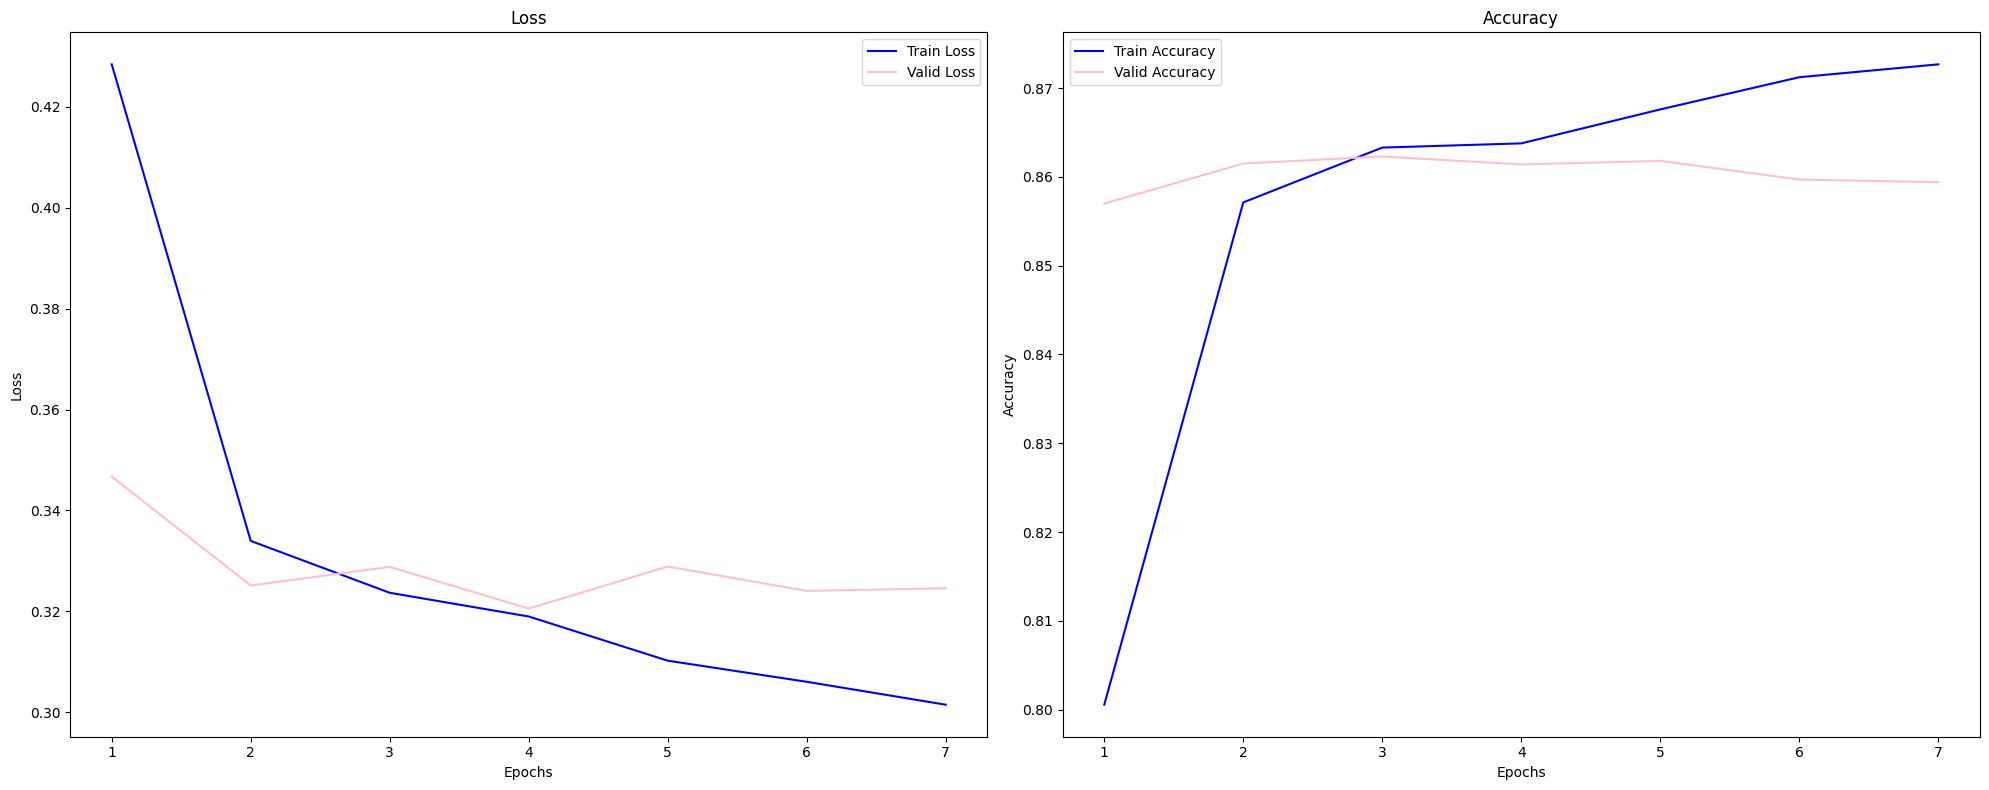

In [ ]:
tr_acc1 = history1.history['accuracy']
tr_loss1 = history1.history['loss']
val_acc1 = history1.history['val_accuracy']
val_loss1 = history1.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss1, 'b', label='Train Loss')
plt.plot(epochs, val_loss1, 'pink', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc1, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc1, 'pink', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**Test du modèle LSTM**

In [ ]:
def preprocess_user_input(text):
    text = remove_numbers(text)
    text = remove_html_tags(text)
    text = remove_symbols(text)
    return preprocess(text)
user_comment = input("Entrez votre commentaire : ")
preprocessed_user_comment = preprocess_user_input(user_comment)
user_comment_sequence = tokenizer.texts_to_sequences([preprocessed_user_comment])
user_comment_padded = pad_sequences(user_comment_sequence, maxlen=max_len)

user_sentiment_pred = model1.predict(user_comment_padded)
user_sentiment = "Positif" if user_sentiment_pred > 0.5 else "Négatif"
print(f"Sentiment prédit pour votre commentaire : {user_sentiment}")

Entrez votre commentaire : i found it interesting since it shows me scenes that are so good
1/1 [==============================] - 0s 323ms/step
Sentiment prédit pour votre commentaire : Positif


**GRU Model**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim))
model2.add(SpatialDropout1D(0.2))
model2.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))  # Changed LSTM to GRU here
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 8
batch_size = 264

history2 = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         100000    
                                                                 
 spatial_dropout1d_3 (Spati  (None, None, 100)         0         
 alDropout1D)                                                    
                                                                 
 gru_1 (GRU)                 (None, 100)               60600     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 160701 (627.74 KB)
Trainable params: 160701 (627.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/8
152/152 [==============================] - 190s 1s/step - loss: 0.4369

**Traçage des courbes Loss et Accuracy model GRU**

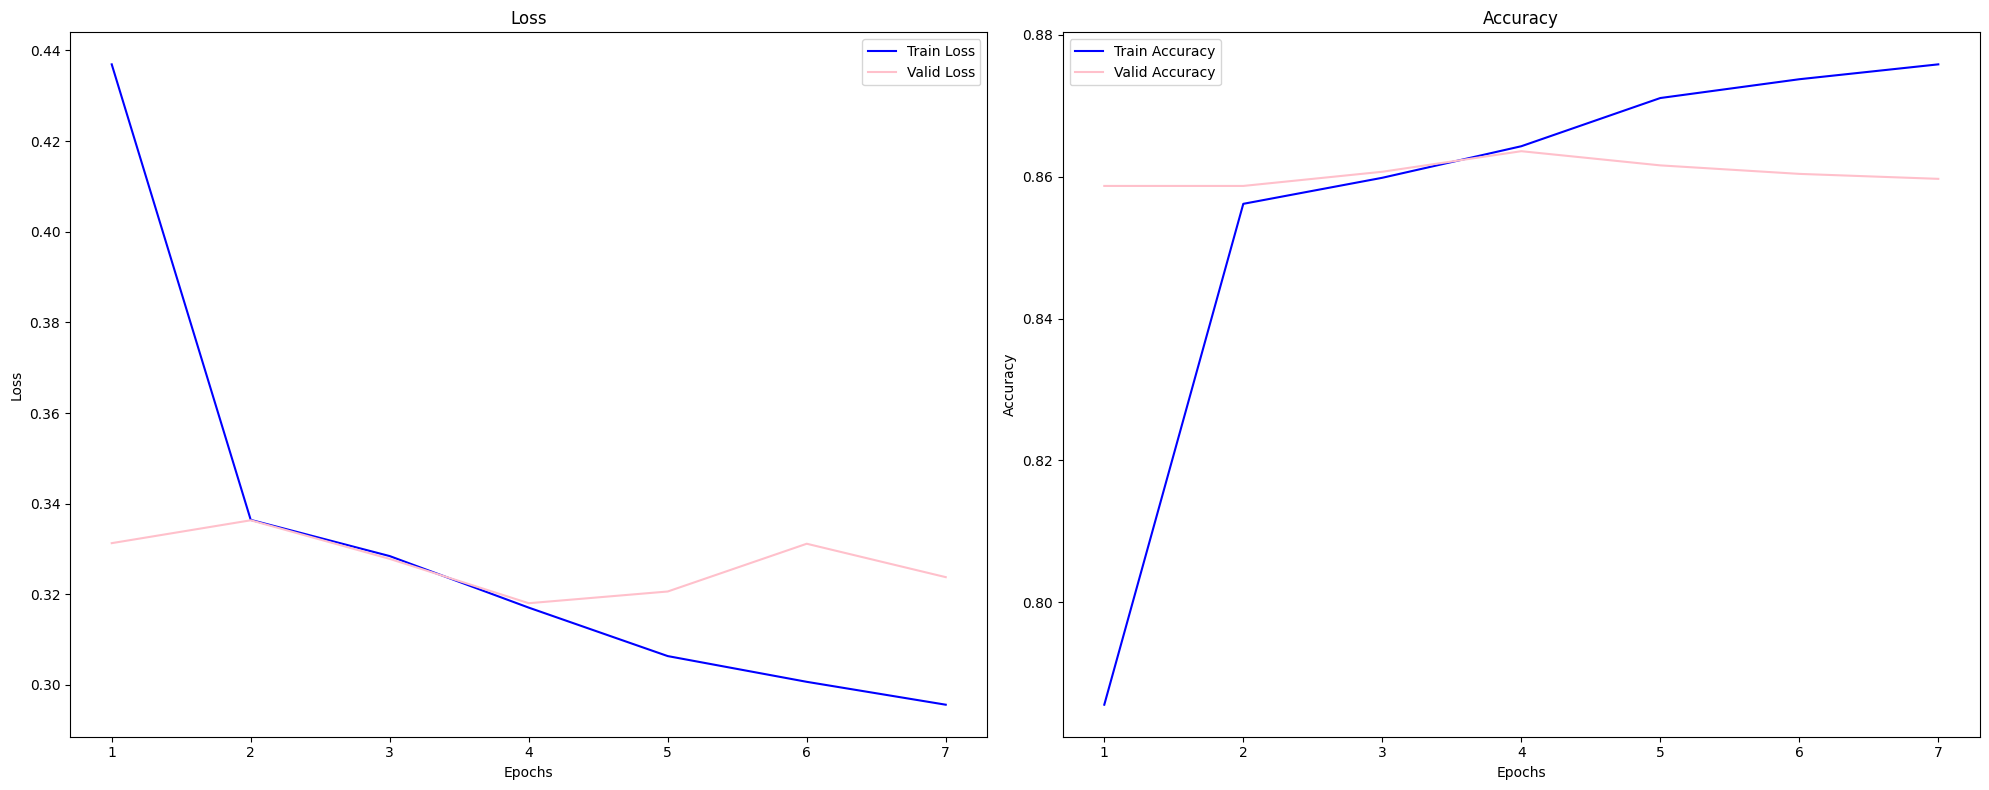

In [ ]:
tr_acc2 = history2.history['accuracy']
tr_loss2 = history2.history['loss']
val_acc2 = history2.history['val_accuracy']
val_loss2 = history2.history['val_loss']

epochs = [i + 1 for i in range(len(tr_acc2))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss2, 'b', label='Train Loss')
plt.plot(epochs, val_loss2, 'pink', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc2, 'pink', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**Test du modèle GRU**

In [ ]:
def preprocess_user_input(text):
    text = remove_numbers(text)
    text = remove_html_tags(text)
    text = remove_symbols(text)
    return preprocess(text)
user_comment = input("Entrez votre commentaire : ")
preprocessed_user_comment = preprocess_user_input(user_comment)
user_comment_sequence = tokenizer.texts_to_sequences([preprocessed_user_comment])
user_comment_padded = pad_sequences(user_comment_sequence, maxlen=max_len)

user_sentiment_pred = model2.predict(user_comment_padded)
user_sentiment = "Positif" if user_sentiment_pred > 0.5 else "Négatif"
print(f"Sentiment prédit pour votre commentaire : {user_sentiment}")